## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

## Import Datasets

In [2]:
df_2004 = pd.read_csv('LokSabha2004.csv')
df_2009 = pd.read_csv('LokSabha2009.csv')
df_2014 = pd.read_csv('LokSabha2014.csv')
df_2019 = pd.read_csv('LokSabha2019.csv')

In [3]:
print(f'Shape of LokSabha2004 dataset {df_2004.shape}')
print(f'Shape of LokSabha2009 dataset {df_2009.shape}')
print(f'Shape of LokSabha2014 dataset {df_2014.shape}')
print(f'Shape of LokSabha2019 dataset {df_2019.shape}')

Shape of LokSabha2004 dataset (3642, 10)
Shape of LokSabha2009 dataset (7920, 10)
Shape of LokSabha2014 dataset (8484, 10)
Shape of LokSabha2019 dataset (7968, 10)


In [4]:
df_2004.head()

,Candidate,Party,Criminal Cases,Education,Age,Total Assets,Constituency,Liabilities,Winner,Gender
0,Manoranjan Bhakta,INC,0,Post Graduate,65,5926740.0,Andaman & Nicobar Islands,272061,1,M
1,A K Biswas,BSP,0,Graduate,61,7876500.0,Andaman & Nicobar Islands,65000,0,M
2,Asit Baran Dutta,IND,0,Graduate,50,3070000.0,Andaman & Nicobar Islands,0,0,M
3,Bishnu Pada Ray,BJP,0,Graduate,54,1250619.0,Andaman & Nicobar Islands,128710,0,M
4,Deepak Biswas,IND,0,Not Given,28,3000.0,Andaman & Nicobar Islands,0,0,M


In [5]:
df_2004['Year'] = 2004
df_2009['Year'] = 2009
df_2014['Year'] = 2014
df_2019['Year'] = 2019

In [6]:
df = pd.concat([df_2004, df_2009, df_2014, df_2019])
df.head()

,Candidate,Party,Criminal Cases,Education,Age,Total Assets,Constituency,Liabilities,Winner,Gender,Year
0,Manoranjan Bhakta,INC,0,Post Graduate,65,5926740.0,Andaman & Nicobar Islands,272061,1.0,M,2004
1,A K Biswas,BSP,0,Graduate,61,7876500.0,Andaman & Nicobar Islands,65000,0.0,M,2004
2,Asit Baran Dutta,IND,0,Graduate,50,3070000.0,Andaman & Nicobar Islands,0,0.0,M,2004
3,Bishnu Pada Ray,BJP,0,Graduate,54,1250619.0,Andaman & Nicobar Islands,128710,0.0,M,2004
4,Deepak Biswas,IND,0,Not Given,28,3000.0,Andaman & Nicobar Islands,0,0.0,M,2004


In [7]:
df = df[df["Age"]>= 18]

In [8]:
parties = df['Party'].unique()
qualifications = df['Education'].unique()
constituencies = df['Constituency'].unique()

print(f'Total Number of parties available = {len(parties)}')
print(f'Number of qualifications = {len(qualifications)}')
print(f'Number of constituencies are {len(constituencies)}')

Total Number of parties available = 1326
Number of qualifications = 12
Number of constituencies are 1301


In [9]:
df.isnull().sum()

Candidate           0
Party               0
Criminal Cases      0
Education           0
Age                 0
Total Assets      778
Constituency        0
Liabilities         0
Winner              0
Gender              0
Year                0
dtype: int64

## Analysis

### Pariticipation of a Single Party

In [10]:
max_candidate = df['Party'].value_counts().sort_values(ascending=False)
print(f'Parties with number of candidates participated(Sorted):- \n{max_candidate[:10]} \nMany more..........')

Parties with number of candidates participated(Sorted):- 
IND                    11620
BSP                     1721
INC                     1709
BJP                     1638
SP                       616
AAP                      461
Bahujan Mukti Party      354
AITC                     257
SHS                      244
JD(U)                    215
Name: Party, dtype: int64 
Many more..........


In [11]:
# Parties with maximum participation
max_participation = list(df['Party'].value_counts().sort_values(ascending=False).index)
print(f'10 Maximum number of candidates participated by a party:- \n{max_participation[:10]}')

10 Maximum number of candidates participated by a party:- 
['IND', 'BSP', 'INC', 'BJP', 'SP', 'AAP', 'Bahujan Mukti Party', 'AITC', 'SHS', 'JD(U)']


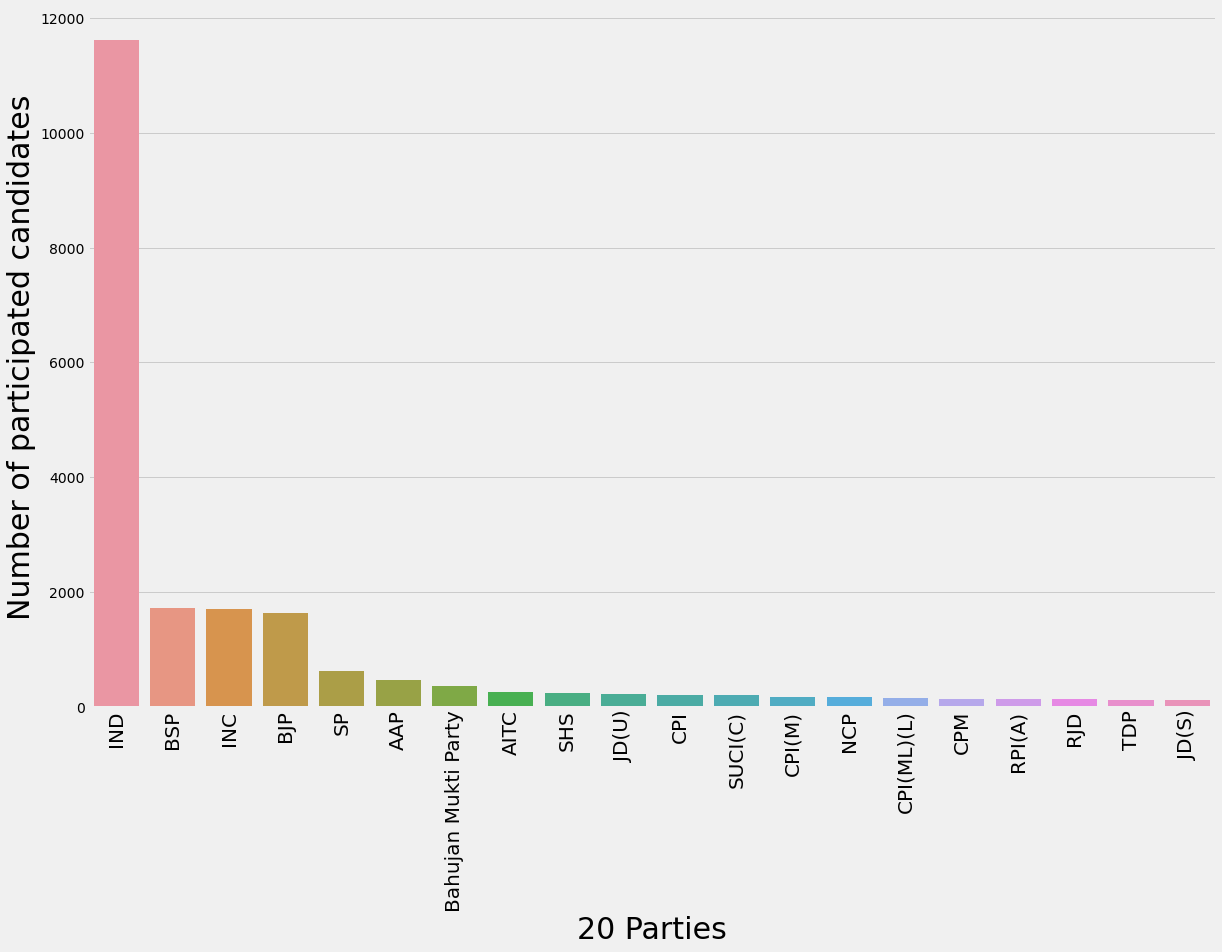

In [12]:
max_candidate_party = max_candidate.reset_index().rename(columns = {'index': 'Party', 'Party':'Count'})
max_20 = max_candidate_party.iloc[:20, :]
plt.figure(figsize = (18, 12))
sns.barplot(x = 'Party', y = 'Count', data = max_20)
plt.xlabel('20 Parties', fontsize = 30)
plt.ylabel('Number of participated candidates', fontsize = 30)
plt.xticks(fontsize = 20, rotation = 90)
plt.show()

### Educational Qualification of the Candidate

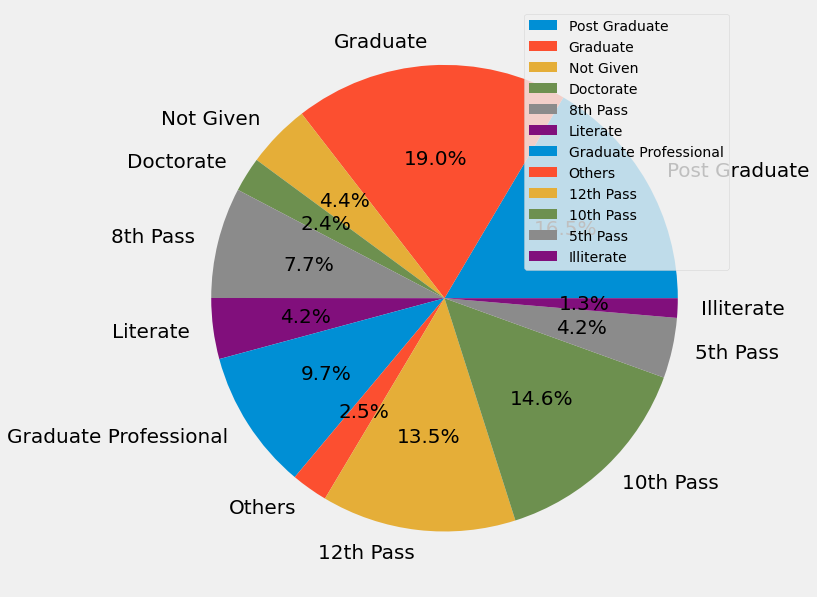

In [13]:
education = pd.DataFrame(df['Education'].value_counts(normalize = True), index = qualifications)
education.plot.pie(subplots=True, autopct = '%1.1f%%', figsize = (10, 10), fontsize = 20)
plt.ylabel('')
plt.show()

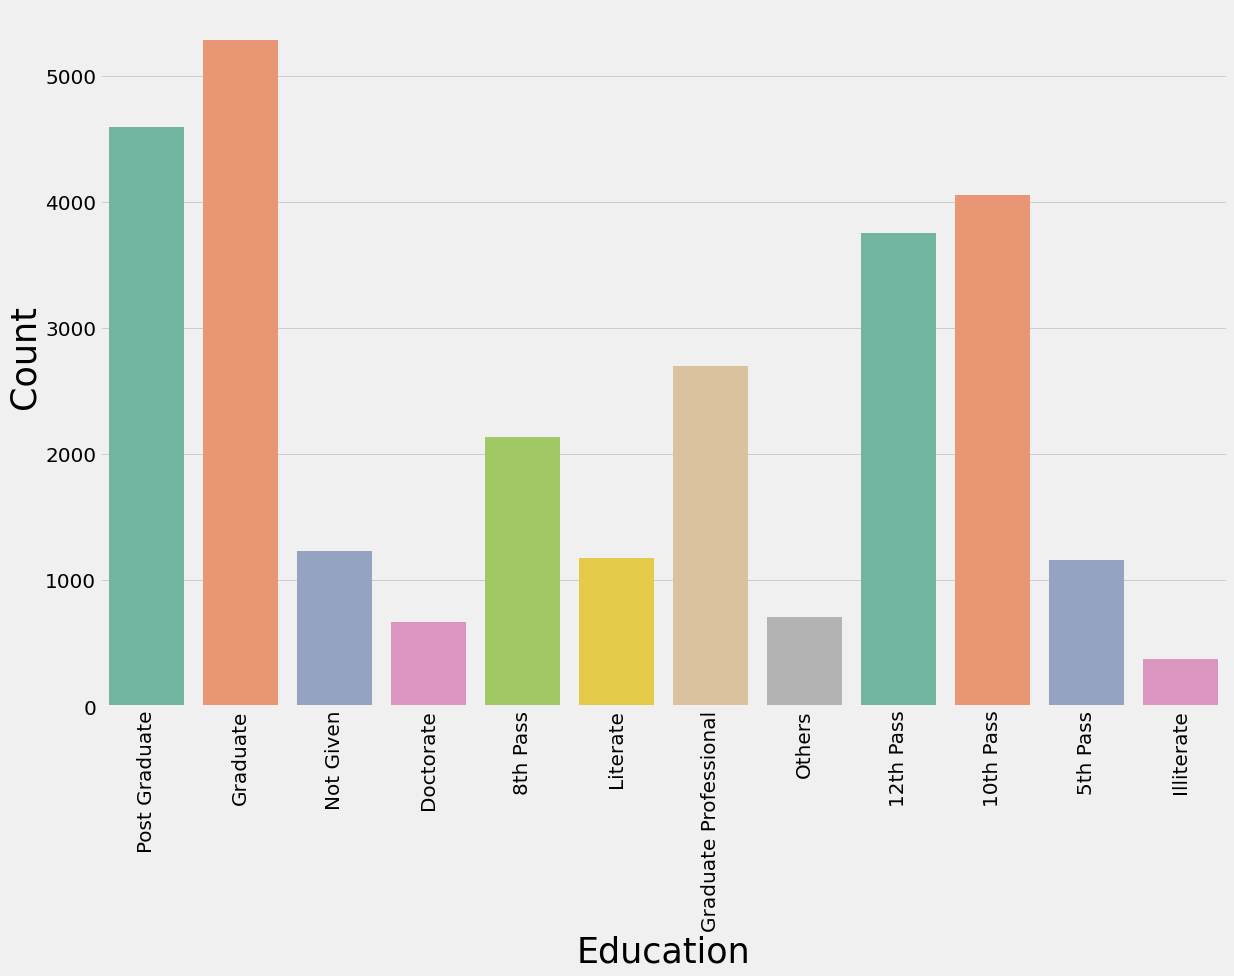

In [14]:
plt.figure(figsize = (18, 12))
sns.countplot(df['Education'], palette = 'Set2')
plt.ylabel('Count',fontsize = 35)
plt.xlabel('Education',fontsize = 35)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20, rotation = 90)
plt.show()

### Criminal Records of the Candidates

In [15]:
criminal = df.sort_values(['Criminal Cases'], ascending = False)      # Individual Cases
print(f'Total Candidates {criminal.shape[0]}')
criminal = criminal[criminal['Criminal Cases'] > 0]
print(f'Candidates with criminal charges on them {criminal.shape[0]}')

Total Candidates 27829
Candidates with criminal charges on them 4559


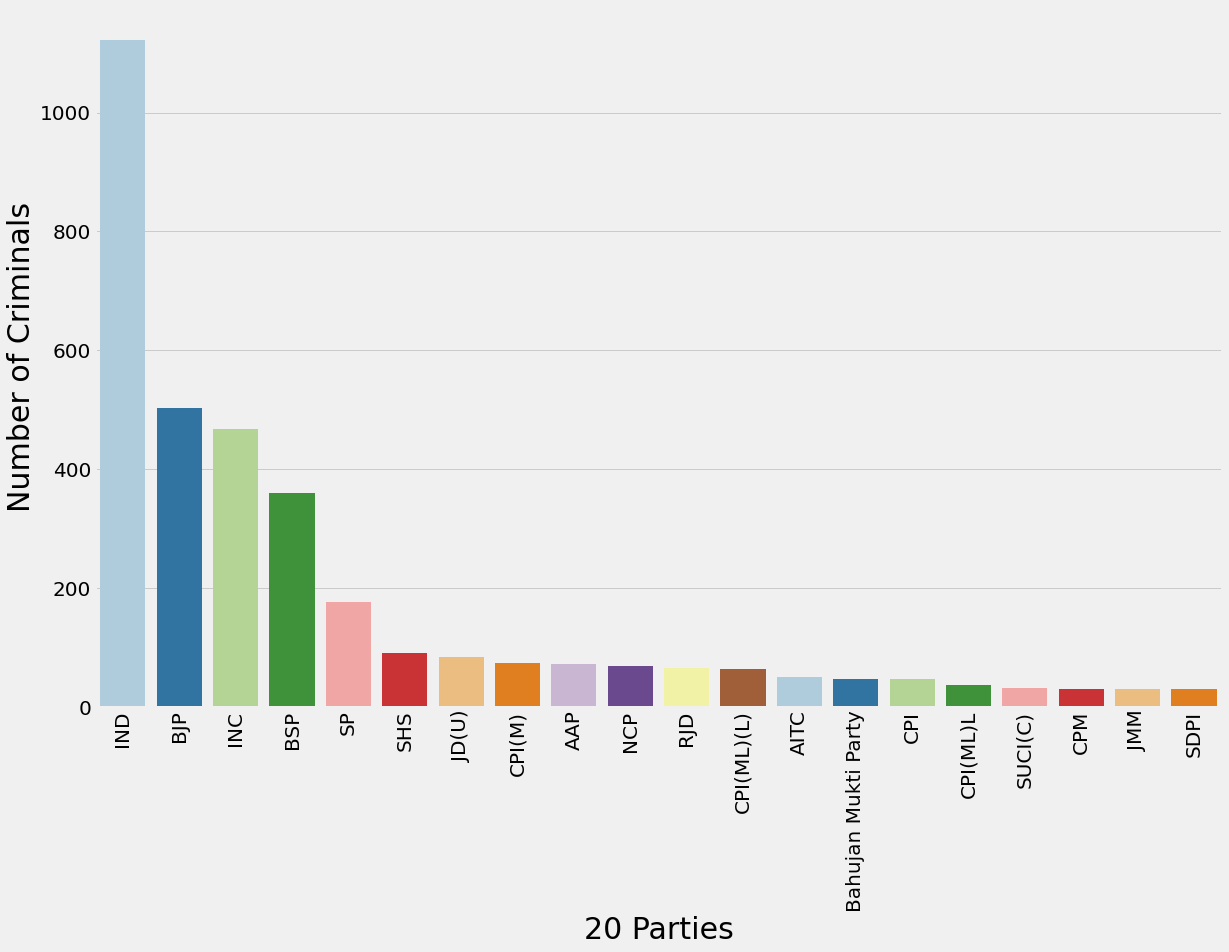

In [16]:
p = criminal['Party'].value_counts().reset_index().rename(columns = {'index':'Party', 'Party':'Criminals'})
max_20 = p.sort_values(by = ['Criminals'], ascending = False)
max_20 = max_20.iloc[:20]

plt.figure(figsize = (18, 12))
sns.barplot(x = 'Party', y = 'Criminals', data = max_20, palette='Paired')
plt.xlabel('20 Parties', fontsize = 30)
plt.ylabel('Number of Criminals', fontsize = 30)
plt.xticks(fontsize = 20, rotation = 90)
plt.yticks(fontsize = 20)
plt.show()

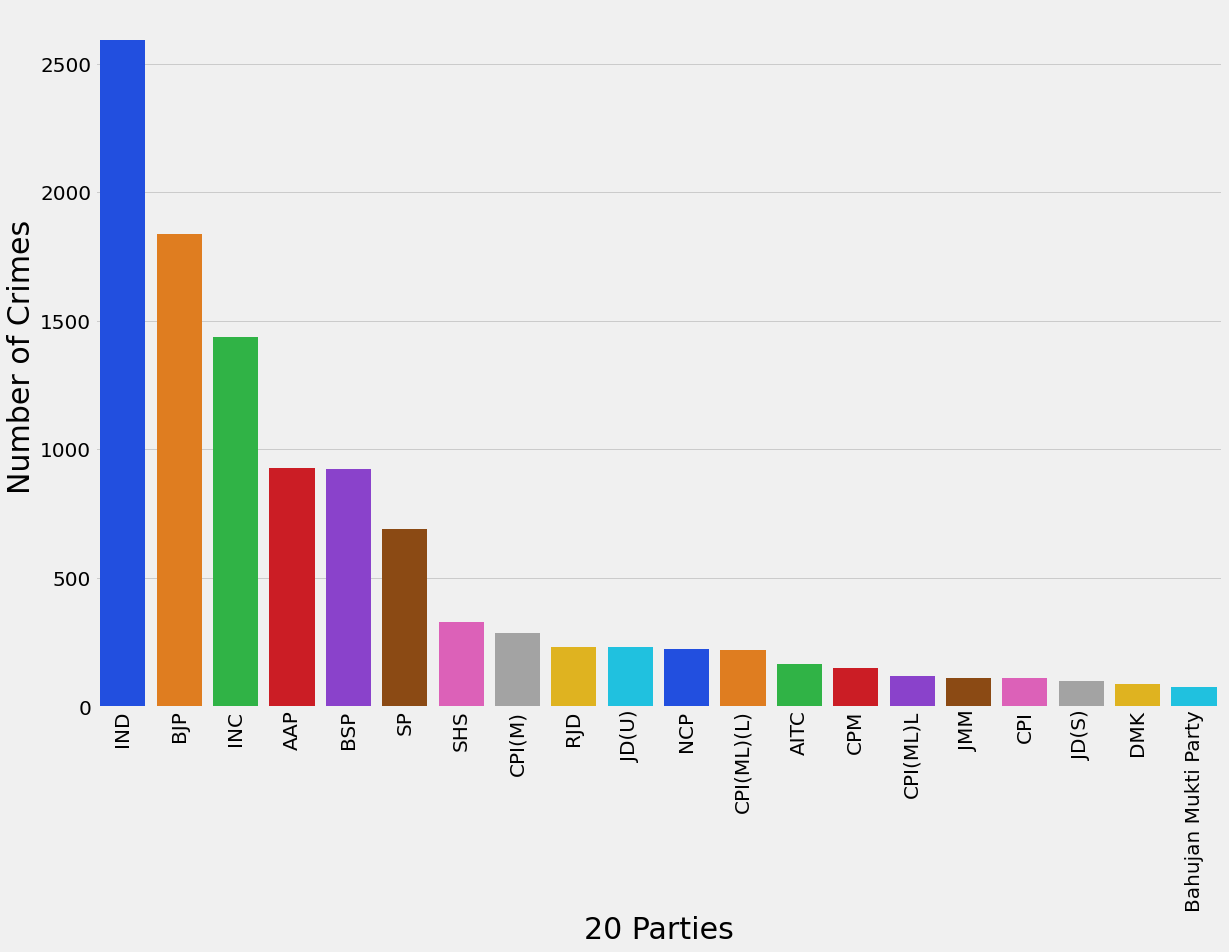

In [17]:
criminal = criminal.groupby('Party').agg({'Criminal Cases':'sum'}).reset_index().rename(columns = {'index':'Party'})
criminal.sort_values(['Criminal Cases'], ascending = False, inplace = True)
max_20 = criminal.iloc[:20]

plt.figure(figsize = (18, 12))
sns.barplot(x = 'Party', y = 'Criminal Cases', data = max_20, palette='bright')
plt.xlabel('20 Parties', fontsize = 30)
plt.ylabel('Number of Crimes', fontsize = 30)
plt.xticks(fontsize = 20, rotation = 90)
plt.yticks(fontsize = 20)
plt.show()

### Age

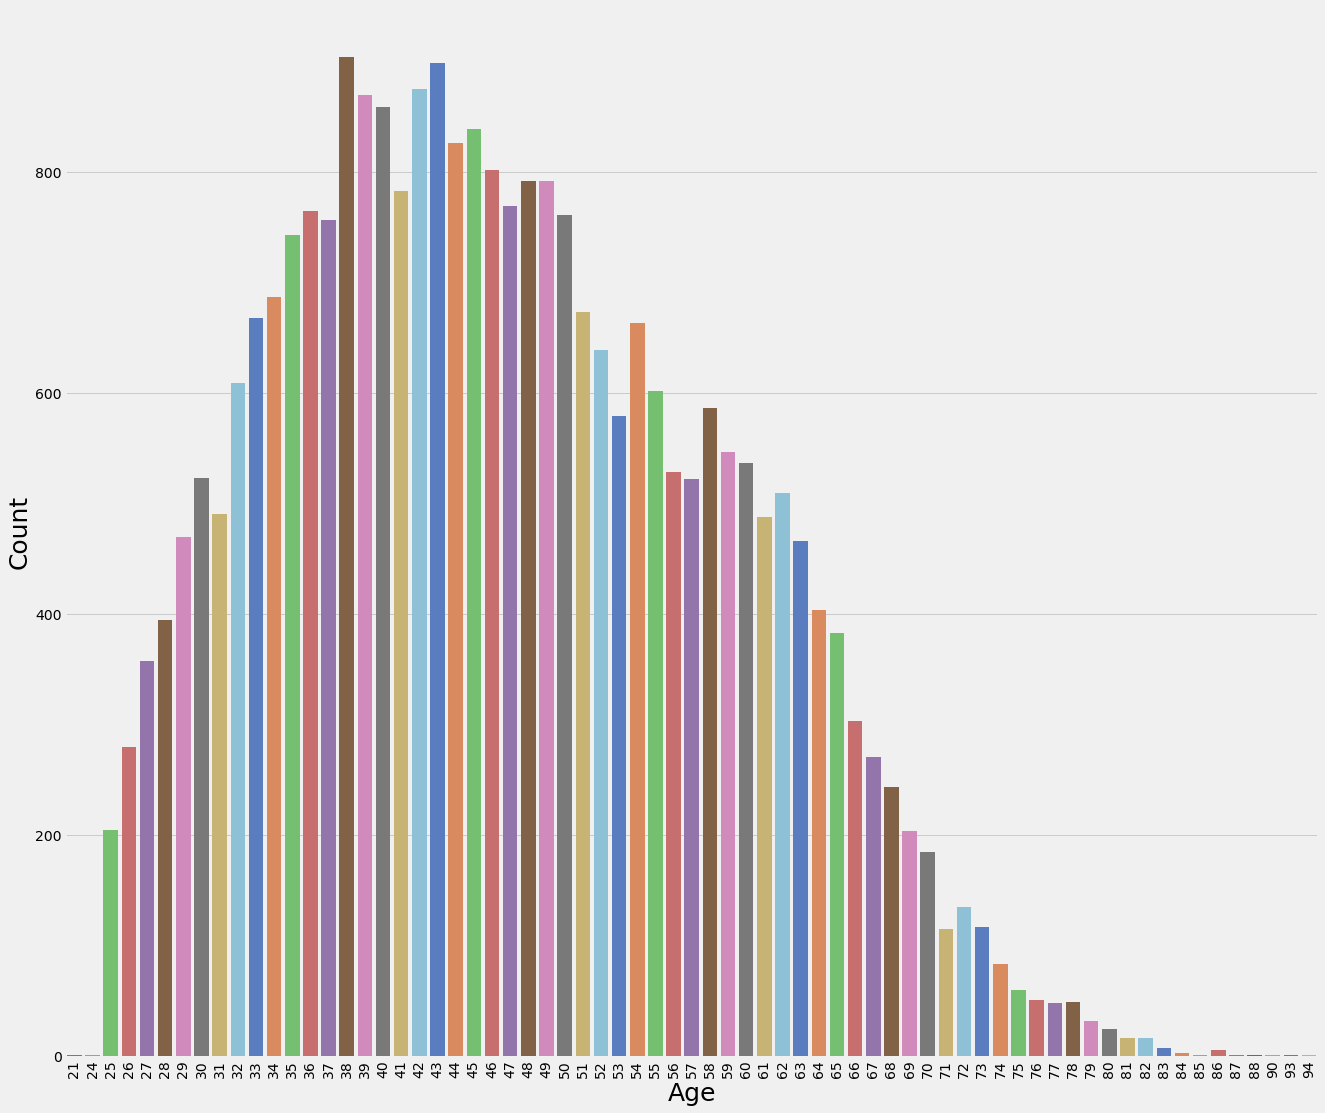

In [18]:
plt.figure(figsize = (20, 18))
sns.countplot(df['Age'], palette = 'muted')
plt.xlabel('Age', fontsize = 25)
plt.ylabel('Count', fontsize = 25)
plt.xticks(rotation = 90)
plt.show()